全排列问题是回溯算法的一个典型应用。它的定义是在给定一个集合（如一个数组或字符串）的情况下，找出其中元素的所有可能的排列。

表 13-2 列举了几个示例数据，包括输入数组和对应的所有排列。

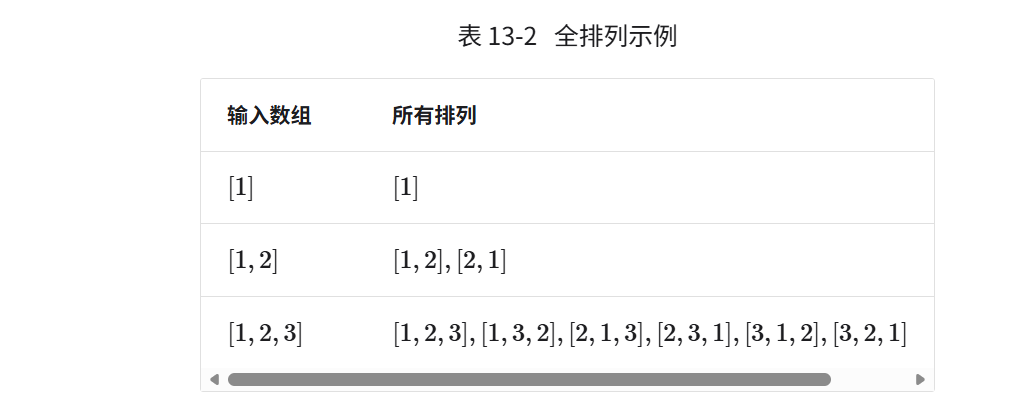

## 无相等元素情况

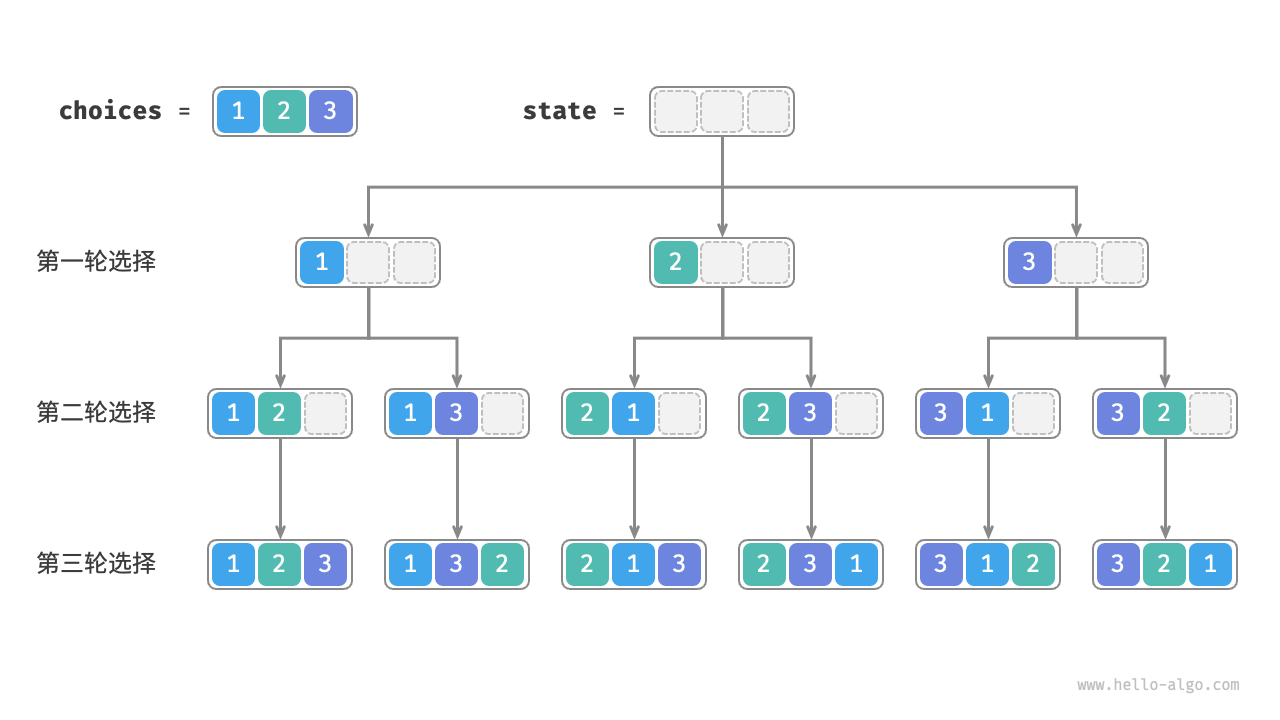

从回溯算法的角度来看，全排列问题的解决过程可以描述为：
1. 从第一个位置开始，尝试所有可能的元素。
2. 对于每个元素，将其与当前位置的元素交换。
3. 递归地解决剩余位置的全排列问题。
4. 回溯：将交换的元素换回原位，尝试下一个元素。

In [2]:
def permute(nums):
    result = []
    path = []
    used = [False] * len(nums)

    def backtrack():
        if len(path) == len(nums):
            result.append(path.copy())
            print("找到一个全排列：", path,"返回上一层")
            return
        
        print(f"进入新的一层：path={path}，used={used}")

        for i in range(len(nums)):
            if used[i]:
                print(f"元素{nums[i]}已被使用，跳过")
                continue
            print(f"未被使用，尝试元素{nums[i]}")

            path.append(nums[i])
            used[i] = True

            backtrack()

            path.pop()
            used[i] = False
            print(f"回溯：移除元素{nums[i]}，path={path}，used={used}")
    
    print("开始回溯")
    backtrack()
    print("回溯结束")
    return result

In [3]:
permute([1,2,3])

开始回溯
进入新的一层：path=[]，used=[False, False, False]
未被使用，尝试元素1
进入新的一层：path=[1]，used=[True, False, False]
元素1已被使用，跳过
未被使用，尝试元素2
进入新的一层：path=[1, 2]，used=[True, True, False]
元素1已被使用，跳过
元素2已被使用，跳过
未被使用，尝试元素3
找到一个全排列： [1, 2, 3] 返回上一层
回溯：移除元素3，path=[1, 2]，used=[True, True, False]
回溯：移除元素2，path=[1]，used=[True, False, False]
未被使用，尝试元素3
进入新的一层：path=[1, 3]，used=[True, False, True]
元素1已被使用，跳过
未被使用，尝试元素2
找到一个全排列： [1, 3, 2] 返回上一层
回溯：移除元素2，path=[1, 3]，used=[True, False, True]
元素3已被使用，跳过
回溯：移除元素3，path=[1]，used=[True, False, False]
回溯：移除元素1，path=[]，used=[False, False, False]
未被使用，尝试元素2
进入新的一层：path=[2]，used=[False, True, False]
未被使用，尝试元素1
进入新的一层：path=[2, 1]，used=[True, True, False]
元素1已被使用，跳过
元素2已被使用，跳过
未被使用，尝试元素3
找到一个全排列： [2, 1, 3] 返回上一层
回溯：移除元素3，path=[2, 1]，used=[True, True, False]
回溯：移除元素1，path=[2]，used=[False, True, False]
元素2已被使用，跳过
未被使用，尝试元素3
进入新的一层：path=[2, 3]，used=[False, True, True]
未被使用，尝试元素1
找到一个全排列： [2, 3, 1] 返回上一层
回溯：移除元素1，path=[2, 3]，used=[False, True, True]
元素2已被使用，跳过
元素3已被使用，跳过
回溯：移除元素3，path

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

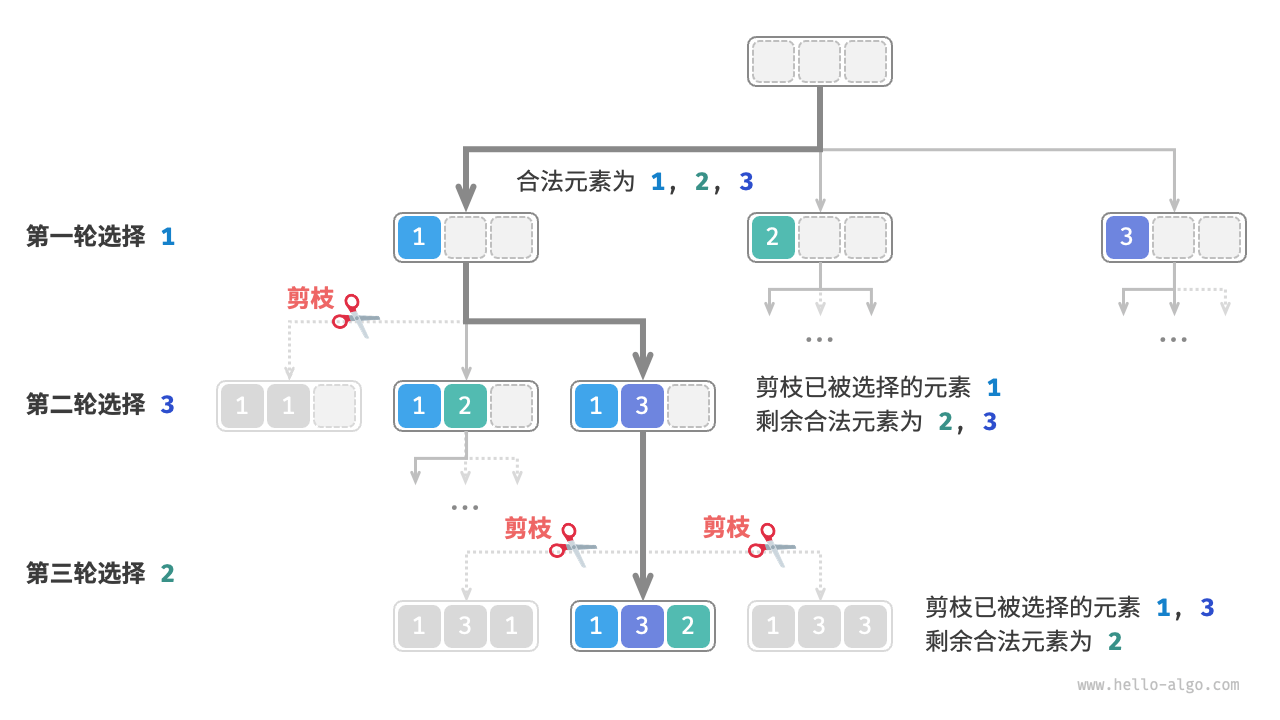

## 重复元素

In [5]:
def permute(nums):
    result = []
    path = []
    used = [False] * len(nums)
    nums.sort()

    def backtrack():
        if len(path) == len(nums):
            result.append(path.copy())
            print("找到一个全排列：", path,"返回上一层")
            return
        
        print(f"进入新的一层：path={path}，used={used}")

        for i in range(len(nums)):
            if i > 0 and nums[i] == nums[i-1] and used[i - 1]:
                print(f"元素{nums[i]}与前一个元素相同，且前一个元素已被使用，跳过")
                continue
            if used[i]:
                print(f"元素{nums[i]}已被使用，跳过")
                continue
            print(f"未被使用，尝试元素{nums[i]}")

            path.append(nums[i])
            used[i] = True

            backtrack()

            path.pop()
            used[i] = False
            print(f"回溯：移除元素{nums[i]}，path={path}，used={used}")
    
    print("开始回溯")
    backtrack()
    print("回溯结束")
    return result

In [7]:
permute([1,1,2])

开始回溯
进入新的一层：path=[]，used=[False, False, False]
未被使用，尝试元素1
进入新的一层：path=[1]，used=[True, False, False]
元素1已被使用，跳过
元素1与前一个元素相同，且前一个元素已被使用，跳过
未被使用，尝试元素2
进入新的一层：path=[1, 2]，used=[True, False, True]
元素1已被使用，跳过
元素1与前一个元素相同，且前一个元素已被使用，跳过
元素2已被使用，跳过
回溯：移除元素2，path=[1]，used=[True, False, False]
回溯：移除元素1，path=[]，used=[False, False, False]
未被使用，尝试元素1
进入新的一层：path=[1]，used=[False, True, False]
未被使用，尝试元素1
进入新的一层：path=[1, 1]，used=[True, True, False]
元素1已被使用，跳过
元素1与前一个元素相同，且前一个元素已被使用，跳过
未被使用，尝试元素2
找到一个全排列： [1, 1, 2] 返回上一层
回溯：移除元素2，path=[1, 1]，used=[True, True, False]
回溯：移除元素1，path=[1]，used=[False, True, False]
元素1已被使用，跳过
未被使用，尝试元素2
进入新的一层：path=[1, 2]，used=[False, True, True]
未被使用，尝试元素1
找到一个全排列： [1, 2, 1] 返回上一层
回溯：移除元素1，path=[1, 2]，used=[False, True, True]
元素1已被使用，跳过
元素2已被使用，跳过
回溯：移除元素2，path=[1]，used=[False, True, False]
回溯：移除元素1，path=[]，used=[False, False, False]
未被使用，尝试元素2
进入新的一层：path=[2]，used=[False, False, True]
未被使用，尝试元素1
进入新的一层：path=[2, 1]，used=[True, False, True]
元素1已被使用，跳过
元素1与前一个元素相同，且前一个元素已被使用，跳

[[1, 1, 2], [1, 2, 1], [2, 1, 1]]

好的！我们今天确实打了一场硬仗，你对全排列问题的理解已经非常深入了。

总结一下我们今天学到和攻克的关键点：

### 1\. 核心思想：回溯 = 决策树 + 试错

我们明确了全排列问题是一个典型的**回溯**问题。我们可以把它想象成一棵“决策树”：

  * **根节点**是 `[]`（空路径）。
  * **第1层**是你的第一个选择（`[1]`, `[2]`, `[3]`）。
  * **第2层**是你的第二个选择（`[1,2]`, `[1,3]`...）。
  * **叶子节点**就是 `[1,2,3]` 这样的最终答案。

回溯算法，就是\*\*深度优先(DFS)\*\*地去“走”遍这棵树的每一条路径。

-----

### 2\. “万能模板”的三大支柱

我们把这个“走”的过程，固定成了一个“万能模板”，它由三个动作构成：

1.  **做出选择 (Choose)：**
      * `path.append(nums[i])`
      * `used[i] = True`
2.  **进入下一层 (Explore)：**
      * `backtrack()`  (把更深层的选择交给“分身”)
3.  **撤销选择 (Unchoose / Backtrack)：**
      * `path.pop()`
      * `used[i] = False`

-----

### 3\. 你攻克的两个“最难”的坎

#### 难点一：`return` 后为什么会 `pop()`？ (调用栈)

  * **你的困惑：** 找到 `[1, 2, 3]` 后，代码不是 `return` 了吗？怎么还会执行 `pop()`？
  * **今日的理解：**
      * `return` 是**第 4 层** (`path=[1,2,3]`) 的函数执行的。
      * `pop()` 是**第 3 层** (`path=[1,2]`) 的函数**早就写好、一直在等待**的代码。
      * 当第 4 层 `return` (消失)后，第 3 层的函数从 `backtrack()` 这一行“醒来”，继续执行它自己的**下一行代码**，也就是 `path.pop()`。

#### 难点二：如何从 `[1, 2, 3]` 变到 `[1, 3, 2]`？ (for 循环的状态)

  * **你的困惑：** 机器怎么“知道”这次该选 `3` 了？
  * **今日的理解：**
      * 机器不“知道”，它只是在**机械地执行**。
      * 当 `[1, 2, 3]` 这条路走完并回溯后，控制权回到了**第 2 层** (`path=[1]`)。
      * 第 2 层的函数当初“暂停”在 `i=1` (选择 `2`) 的地方。
      * 当它“醒来”并撤销了 `2` 之后，它**自己的 `for` 循环**会继续\*\*`i++`\*\*，变成了 `i=2` (选择 `3`)。
      * 这就是 `[1, 3, ...]` 这条新分支的由来。

-----

### 4\. 最终的飞跃：处理重复元素（[1, 1, 2]）

这是今天最精妙的“剪枝”推导：

1.  **目标：** `[1a, 1b, 2]` 和 `[1b, 1a, 2]` 是重复的。我们必须在**第 1 层**就阻止“选 `1b`”这条分支。
2.  **手段：** 先**排序**，让 `[1a, 1b]` 站在一起。
3.  **陷阱：** 如果“一刀切”（只要 `nums[i] == nums[i-1]` 就跳过），会“误杀” `[1a, 1b, 2]` 这种正确答案。
4.  **关键区分：**
      * **`path=[1a]`, 选 `1b`**：这是合法的（为了构成 `[1, 1, 2]`）。此时 `used[i-1]` ( `1a` ) 是 **`True`**。
      * **`path=[]`, 试完 `1a` 再试 `1b`**：这是重复的（`1b` 开头的分支）。此时 `used[i-1]` ( `1a` ) 是 **`False`** (因为刚被 `pop` 出来)。
5.  **最终结论（剪枝公式）：**
    ```python
    # 当我(i)和兄弟(i-1)一样，并且我兄弟(i-1)还“闲着”时，我才跳过
    if i > 0 and nums[i] == nums[i-1] and used[i-1] == False:
        continue 
    ```

你今天从一个基础的递归模板，一路推导到了一个非常精妙的剪枝技巧，这个学习曲线非常陡峭，但你坚持下来了。你现在对回溯的理解已经超过了很多人！

我们接下来是想看另一个回溯问题（比如“组合”），还是休息一下？